# Walkability of Pittsburgh Neighborhoods
Niam Noaman

## Introduction to Metric
Walkability in urban planning/design refers to how suited to or adapted for walking an area is. In this case, the data set covers census tract walkability scores from 2014. Just for reference, a census tract is a geographic region defined for the purpose of taking a census. However, there are multiple census tracts per neighborhood within the city of Pittsburgh, so we must keep that in mind for later on. The scores range from 0-100, 0 being he least and 100 being the most walkable. Locations closer to the city tend to have a higher walkability score than those farther away. The average walkability score of the city of Pittsburgh is 62 which is higher than most major cities in the United States. Since our overall metric was what neighborhood would best be for owning a dog in we figured that more walkable neighborhoods would be better to own dogs in.
## Code:

After importing pandas, I created dataframes from the walkability score data sheet as well as the census tract data sheet. The walkability score data sheet only had census tract numbers associated to it, so I had use the census tract datasheet to link census areas with neighborhoods. I decided to add an extra column that would later be filled in with the neighborhood name.

In [1]:
import pandas as pd
walk = pd.read_csv("walkscorect.xls-walk-score-by-ct.csv")
censusTractData = pd.read_csv("9756af5f-3320-4601-84e2-347d64071e25.csv")
walk["hood"] = pd.NaT #Create a column of empty "hood values"

Just to show what that looks like:

In [2]:
walk.head()

,Census Tract,Walk Score,hood
0,10300,82,NaT
1,20100,100,NaT
2,20300,83,NaT
3,30500,77,NaT
4,40200,71,NaT


I then had to iterate through each of the rows, read the census tract number, and find it's corrosponding neighborhood in the census tract data sheet. I ran into a problem where some census tracts referred to areas outside of the city. These data points would return empty dataframes which is why I impleteted the error check. If the nieghborhood did not exist within the city, I just set the neighborhood to "N/A."

In [3]:
for i in range(0,len(walk.index)):
    censusTract = walk.iat[i,0] #get census tract of column
    neighborhood = censusTractData.loc[censusTractData['tractce10'] == censusTract] #Get the neighborhood name from the census tract corrosponding to it
    try: #Sometimes the dataframe would be empty since census tracts do not exist in the city of Pittsburgh (Not in census tract data) Therefore we have to error check to make sure a value exists, or input a false value otherwise
        hood = neighborhood.iat[0,13] #gets the nieghborhood name
    except:
        hood = "N/A" #Sets to N/A if cannot find a value at 0,13 in the dataframe
    walk.loc[i, 'hood'] = hood #sets the column "hood" as the neighborhood name

What the walk dataframe looks like after adding the neighborhood:

In [4]:
walk.head()

,Census Tract,Walk Score,hood
0,10300,82,Bluff
1,20100,100,Central Business District
2,20300,83,Strip District
3,30500,77,Crawford-Roberts
4,40200,71,West Oakland


Remember how there were multiple census districts per neighborhood? I had to average the walk score of the census tracts within a nieghborhood to find the overall walkabiity score of the neighborhood. I used pandas aggregate function to do this effeciently and grouped together multiple census tracts under one neighborhood name. I then removed the census tract number since it becomes innacurate and is not needed for reading/analyzing the data.

In [5]:
aggregation_functions = {'Census Tract': 'first', 'Walk Score': 'mean', 'hood': 'first'} #Determines how to aggregate the data frame
df_new = walk.groupby(walk['hood']).aggregate(aggregation_functions) #There are multiple census tracts per neighborhood - this combines all of them into one walkability score for the entire neighborhood
del df_new["Census Tract"] #Removes the Census Tract since we do not need it. Just the neighborhood name
df_new = df_new[df_new["hood"].str.contains("N/A") == False] #Removes N/A data value from the data frame

Now that the data is cleaned up. We can analyze it.

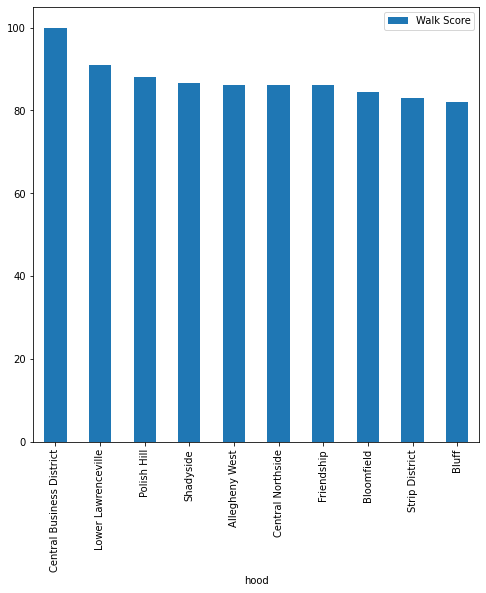

In [6]:
df_new.nlargest(10, "Walk Score").plot.bar(rot=90,figsize =(8,8)) #Plots the 10 highest neighborhoods in walkability scores

In [7]:
df_new.nlargest(10, "Walk Score")

,Walk Score,hood
hood,,
Central Business District,100.0,Central Business District
Lower Lawrenceville,91.0,Lower Lawrenceville
Polish Hill,88.0,Polish Hill
Shadyside,86.6,Shadyside
Allegheny West,86.0,Allegheny West
Central Northside,86.0,Central Northside
Friendship,86.0,Friendship
Bloomfield,84.4,Bloomfield
Strip District,83.0,Strip District


From the data above we can conclude that the top three most walkable neighborhoods in Pittsburgh are the Central Business District, Lower Lawrenceville, and Polish Hill. You can see where these three neighborhoods' walkability scores lie in comparison to the other seven neighborhoods that are part of the top 10 most walkable neighborhoods in Pittsburgh.

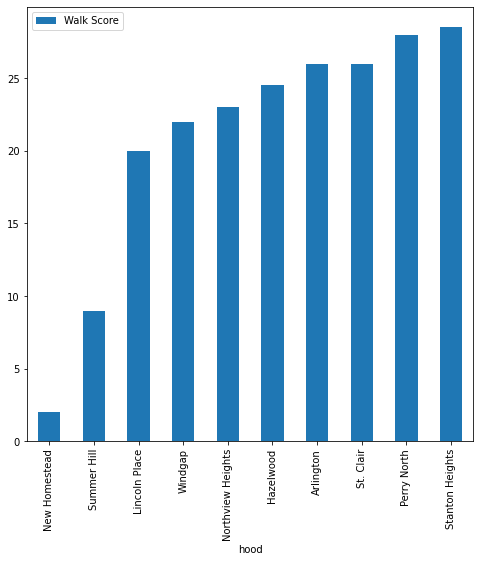

In [8]:
df_new.nsmallest(10, "Walk Score").plot.bar(rot=90,figsize =(8,8)) #Plots the 10 highest neighborhoods in walkability scores

In [9]:
df_new.nsmallest(10, "Walk Score")

,Walk Score,hood
hood,,
New Homestead,2.0,New Homestead
Summer Hill,9.0,Summer Hill
Lincoln Place,20.0,Lincoln Place
Windgap,22.0,Windgap
Northview Heights,23.0,Northview Heights
Hazelwood,24.5,Hazelwood
Arlington,26.0,Arlington
St. Clair,26.0,St. Clair
Perry North,28.0,Perry North


From the data above we can conclude that the top three least walkable neighborhoods in Pittsburgh are New Homestead, Summer Hill, and Lincoln Place. You can see where these three neighborhoods' walkability scores lie in comparison to the other seven neighborhoods that are part of the top 10 least walkable neighborhoods in Pittsburgh.

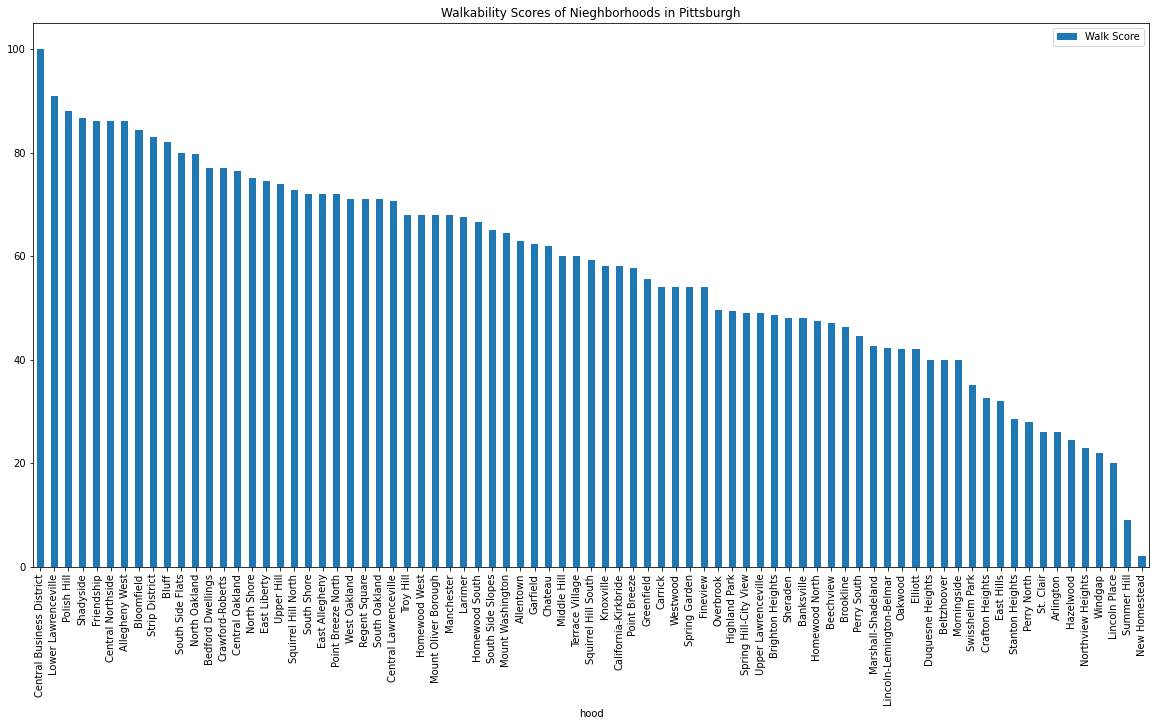

In [10]:
df_new.sort_values(["Walk Score"],ascending=False).plot.bar(rot=90, figsize=(20,10), title = "Walkability Scores of Nieghborhoods in Pittsburgh")

I decided to add a large bar graph that contains all the neighborhoods and their walk scores, just to have a visual of all the neighborhoods in one graph.

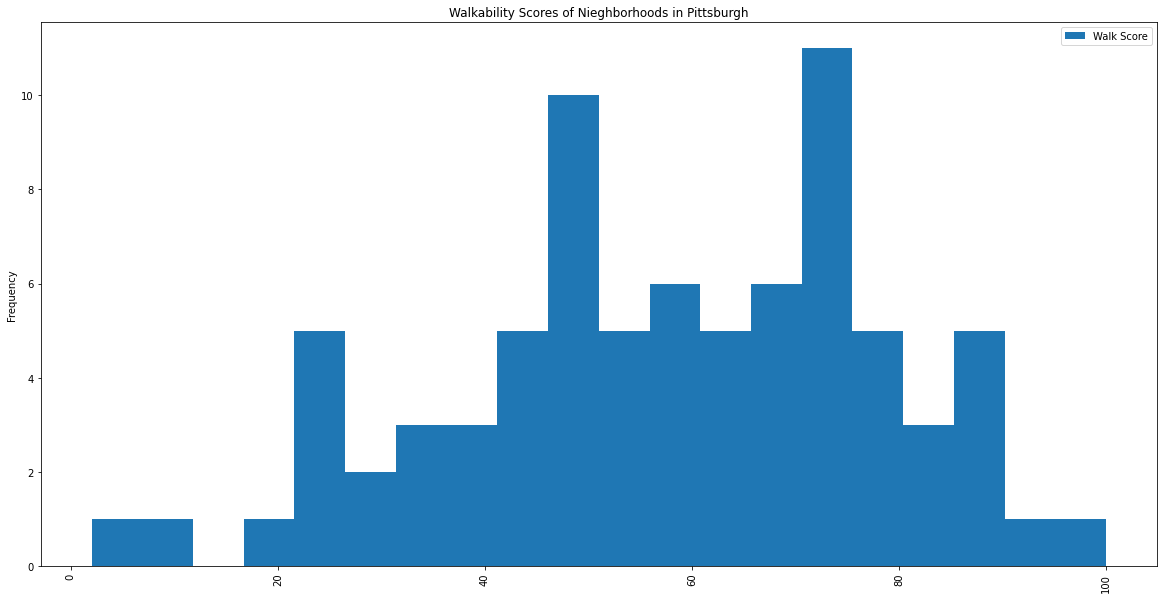

In [11]:
df_new.sort_values(["Walk Score"],ascending=True).plot.hist(rot=90, figsize=(20,10), title = "Walkability Scores of Nieghborhoods in Pittsburgh",bins=20)

In [12]:
df_new["Walk Score"].mean()

57.346413502109684

In this case we can observe that a lot of neighborhoods in Pittsburgh lie within the 40-80 walkability score range. The average walkability score of neighborhoods in Pittsburgh according to our data is 57.3. This value is 5 units off of the reported value (63) which means the 2014 walkability score data is fairly accurate to more recent data.

## Conclusion

**Central Business Distric, Lower Lawrenceville, and Polish Hill are the most walkable neighborhoods in Pittsburgh** After looking at all the data we can determine the best neighborhoods in terms of walkability. Central Business Distric, Lower Lawrenceville, and Polish Hill were the winners by this metric. These neighborhoods have walkability scores of **100, 91, and 88** respectively. After looking at this data we can also conclude that you should stay away from any of the neighborhoods lower than a wa